## SpaceShip Titanic - EDA + Sklearn Pipeline + ML 

Author: Atri Saxena 
mail: atrisaxena2@gmail.com

In [1]:
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from termcolor import colored
import pandas as pd 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors  import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import WhiteKernel

In [2]:
root_dir = '../input/spaceship-titanic/'
files_dir = os.path.join(root_dir) 
filenames = os.listdir(files_dir)
filenames

['sample_submission.csv', 'train.csv', 'test.csv']

In [3]:
train_df = pd.read_csv(os.path.join(root_dir,'train.csv'))
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [4]:
test_df = pd.read_csv(os.path.join(root_dir,'test.csv'))
test_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train_df.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


## Visualize Missing Values

TRAINING DATA:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


<AxesSubplot:title={'center':'TRAINING SET - missing values'}>

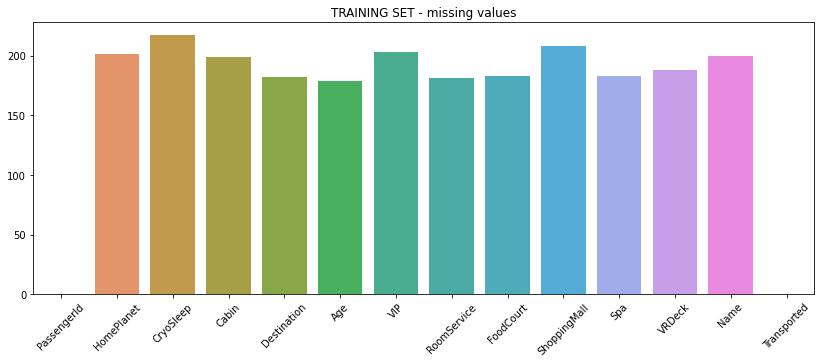

In [7]:
missing_col = train_df.isna().sum()
print(f"TRAINING DATA:\n{missing_col}")
plt.figure(figsize=(14,5))
plt.title("TRAINING SET - missing values")
plt.xticks(rotation = 45)
sns.barplot(y=missing_col.values,x=train_df.columns)

Text(0.5, 1.0, 'TRAINING SET - missing values distribution')

<Figure size 1008x360 with 0 Axes>

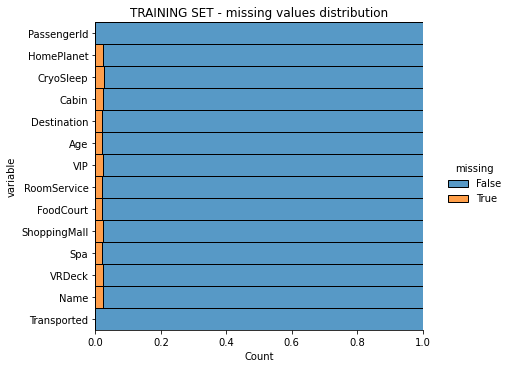

In [8]:
plt.figure(figsize=(14,5))
sns.displot(
    data=train_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title("TRAINING SET - missing values distribution")

TEST DATA:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


<AxesSubplot:title={'center':'TEST SET - missing values'}>

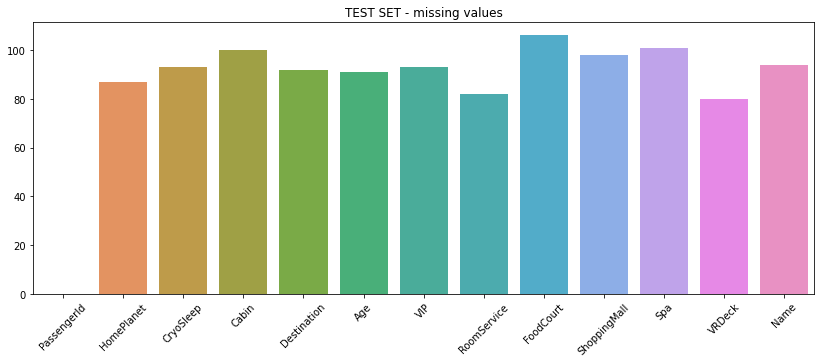

In [9]:
missing_col = test_df.isna().sum()
print(f"TEST DATA:\n{missing_col}")
plt.figure(figsize=(14,5))
plt.title("TEST SET - missing values")
plt.xticks(rotation = 45)
sns.barplot(y=missing_col.values,x=test_df.columns)

Text(0.5, 1.0, 'TEST SET - missing values distribution')

<Figure size 1008x360 with 0 Axes>

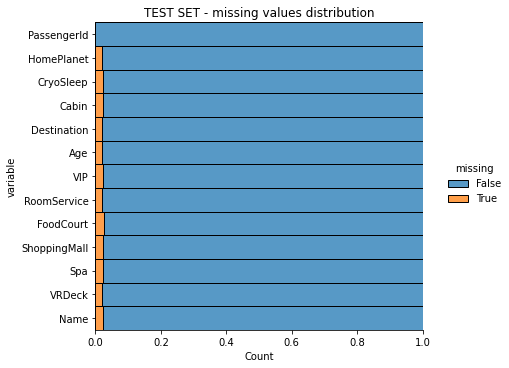

In [10]:
plt.figure(figsize=(14,5))
sns.displot(
    data=test_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title("TEST SET - missing values distribution")

## Handle Missing Values

In [11]:
categorical = ['HomePlanet','CryoSleep','Destination','VIP','Cabin']
numerical = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Age']
target_label = 'Transported'

In [12]:
#Filling Numerical Missing values
numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
numerical_imputer.fit(train_df[numerical])
train_imput = numerical_imputer.transform(train_df[numerical])
test_imput = numerical_imputer.transform(test_df[numerical])

In [13]:
#Filling Missing values
for i in range(len(numerical)):
    train_df.loc[:, numerical[i]] = train_imput[:,i]  
    test_df.loc[:, numerical[i]] = test_imput[:,i]  

In [14]:
#Filling Numerical Missing values
categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
categorical_imputer.fit(train_df[categorical])
train_imput = categorical_imputer.transform(train_df[categorical])
test_imput = categorical_imputer.transform(test_df[categorical])

In [15]:
#Filling Missing values
for i in range(len(categorical)):
    train_df.loc[:, categorical[i]] = train_imput[:,i]  
    test_df.loc[:, categorical[i]] = test_imput[:,i]  

Text(0.5, 1.0, 'TRAIN SET - After filling missing values')

<Figure size 1008x360 with 0 Axes>

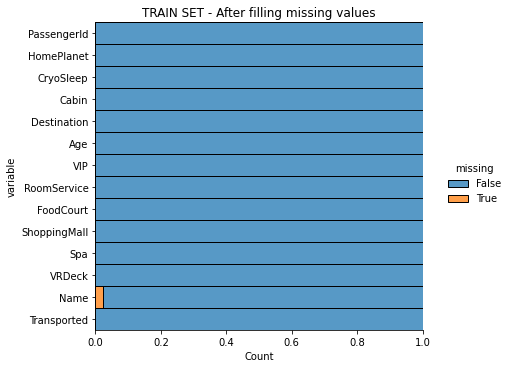

In [16]:
plt.figure(figsize=(14,5))
sns.displot(
    data=train_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title("TRAIN SET - After filling missing values")

Text(0.5, 1.0, 'TEST SET - After filling missing values')

<Figure size 1008x360 with 0 Axes>

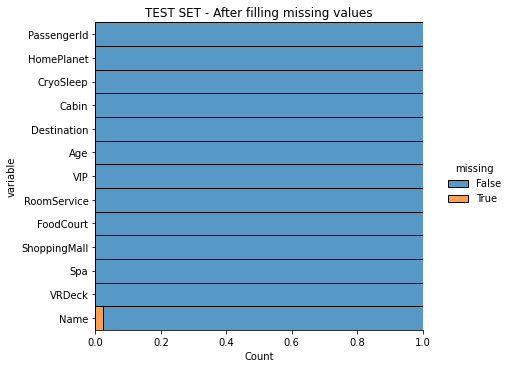

In [17]:
plt.figure(figsize=(14,5))
sns.displot(
    data=test_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title("TEST SET - After filling missing values")

## Create features 

There are various features which can be created. such as: 

- `passenger_id`: As input data is given in form of gggg_pp. Therefore gggg is the group and pp is the person in the group. We can seperate this and create two features out of it. 
- `Cabin`: For cabin there are three more features `Deck/Num/Side`. 
- `Age`: Age data is numerical form. We can create bins from that and divide data into some groups. 

Let's do it

In [18]:
#Passenger_id 
#Train
gggg_pp = [passenger_id.split("_") for passenger_id in train_df['PassengerId'].values]
gggg_pp = np.array(gggg_pp)
train_df['gggg'] = gggg_pp[:,0]
train_df['pp'] = gggg_pp[:,1]

#Test
gggg_pp = np.array([passenger_id.split("_") for passenger_id in test_df['PassengerId'].values])
test_df['gggg'] = gggg_pp[:,0]
test_df['pp'] = gggg_pp[:,1]

In [19]:
mode = train_df["gggg"].mode()[0]
maxP_inGroup = len(train_df[train_df["gggg"] == mode])
print("The maximum number of passengers in a single group is",maxP_inGroup)

The maximum number of passengers in a single group is 8


In [20]:
train_df['pp'] = train_df['pp'].astype('int64')
test_df['pp'] = test_df['pp'].astype('int64')

Value Counts based on the group size:

Gr. size, Count
1    4805
2    1682
3    1020
4     412
5     265
7     231
6     174
8     104
Name: group_size, dtype: int64


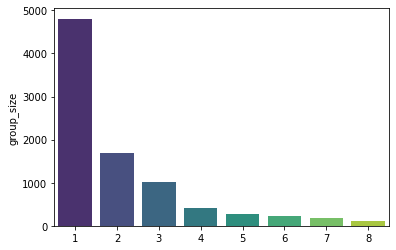

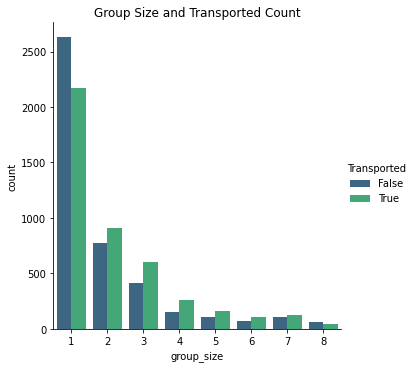

In [21]:
train_df['group_size'] = 0
for i in range(maxP_inGroup):
    curr_gggg = train_df[train_df['pp'] == i + 1]['gggg'].to_numpy()
    train_df.loc[train_df['gggg'].isin(curr_gggg), 'group_size'] = i + 1
    
#plt.figure(figsize=(12,8))
print(colored("Value Counts based on the group size:\n", 'cyan', attrs=['underline', 'bold']))
print(colored("Gr. size, Count", 'blue', attrs=['bold']))
print(train_df['group_size'].value_counts())
sns.barplot(y=train_df['group_size'].value_counts(), x=np.unique(train_df['pp']), palette='viridis')
plt.show()
sns.catplot(x="group_size",  kind="count", hue='Transported', data=train_df, palette='viridis').set(title='Group Size and Transported Count')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Value Counts based on the group size:

Gr. size, Count
1    2524
2     947
3     438
4     182
5      89
6      47
7      42
8       8
Name: group_size, dtype: int64


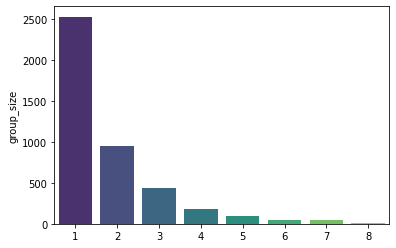

In [22]:
#Test data 
test_df['group_size'] = 0
for i in range(maxP_inGroup):
    curr_gggg = test_df[train_df['pp'] == i + 1]['gggg'].to_numpy()
    test_df.loc[test_df['gggg'].isin(curr_gggg), 'group_size'] = i + 1
    
#plt.figure(figsize=(12,8))
print(colored("Value Counts based on the group size:\n", 'cyan', attrs=['underline', 'bold']))
print(colored("Gr. size, Count", 'blue', attrs=['bold']))
print(test_df['group_size'].value_counts())
sns.barplot(y=test_df['group_size'].value_counts(), x=np.unique(test_df['pp']), palette='viridis')
plt.show()

In [23]:
#Cabin 
train_df['Cabin'] = train_df['Cabin'].astype('str')
deck_num_side = [data.split('/') for data in train_df['Cabin'].values]
deck_num_side = np.array(deck_num_side)
train_df['deck'] = deck_num_side[:,0]
train_df['num'] = deck_num_side[:,1].astype('float64')
train_df['side'] = deck_num_side[:,2] 

deck_num_side = np.array([str(data).split('/') for data in test_df['Cabin'].values]) 
test_df['deck'] = deck_num_side[:,0]
test_df['num'] = deck_num_side[:,1].astype('float64')
test_df['side'] = deck_num_side[:,2] 

In [24]:
#Save Passenger list for submission
Id_test_list = test_df["PassengerId"].tolist()

In [25]:
#We can drop Passenger_id, Cabin 
train_df.drop(['PassengerId','Cabin','Name','gggg','pp','group_size'], axis=1, inplace= True )
test_df.drop(['PassengerId','Cabin','Name','gggg','pp','group_size'],axis=1, inplace= True )

<AxesSubplot:title={'center':'Age Bins'}, xlabel='Count', ylabel='Bins range'>

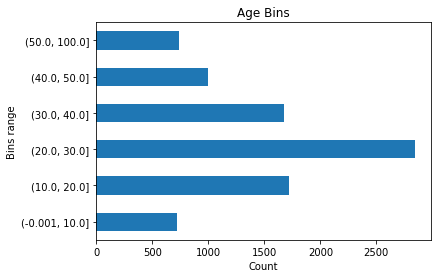

In [26]:
#Age 
plt.title('Age Bins')
plt.xlabel("Count")
plt.ylabel('Bins range')
train_df['Age'].value_counts(bins=[0,10,20,30,40,50,100], sort=False).plot(kind='barh')

In [27]:
bins = [0,10,20,30,40,50,100]
labels = ['Age_10', 'Age_20','Age_30','Age_40','Age_50','Age_100']
train_df['Age'] = pd.cut(x = train_df['Age'], bins = bins, labels = labels, include_lowest = True)

test_df['Age'] = pd.cut(x = test_df['Age'], bins = bins, labels = labels, include_lowest = True)



In [28]:
train_df['Age'] = train_df['Age'].astype('object')
test_df['Age'] = test_df['Age'].astype('object')

## Visualize the Training features

In [29]:
num_features = list(train_df.select_dtypes(include='number'))
cat_features = list(train_df.select_dtypes(exclude='number'))
test_categ_feats = list(test_df.select_dtypes(exclude='number'))
print(f"Numerical Features: {num_features}")
print(f"Categorical Features: {cat_features}")
print(f"Test Categorical Features: {test_categ_feats}")

Numerical Features: ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'num']
Categorical Features: ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'Transported', 'deck', 'side']
Test Categorical Features: ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'deck', 'side']


### Numerical Features Analysis

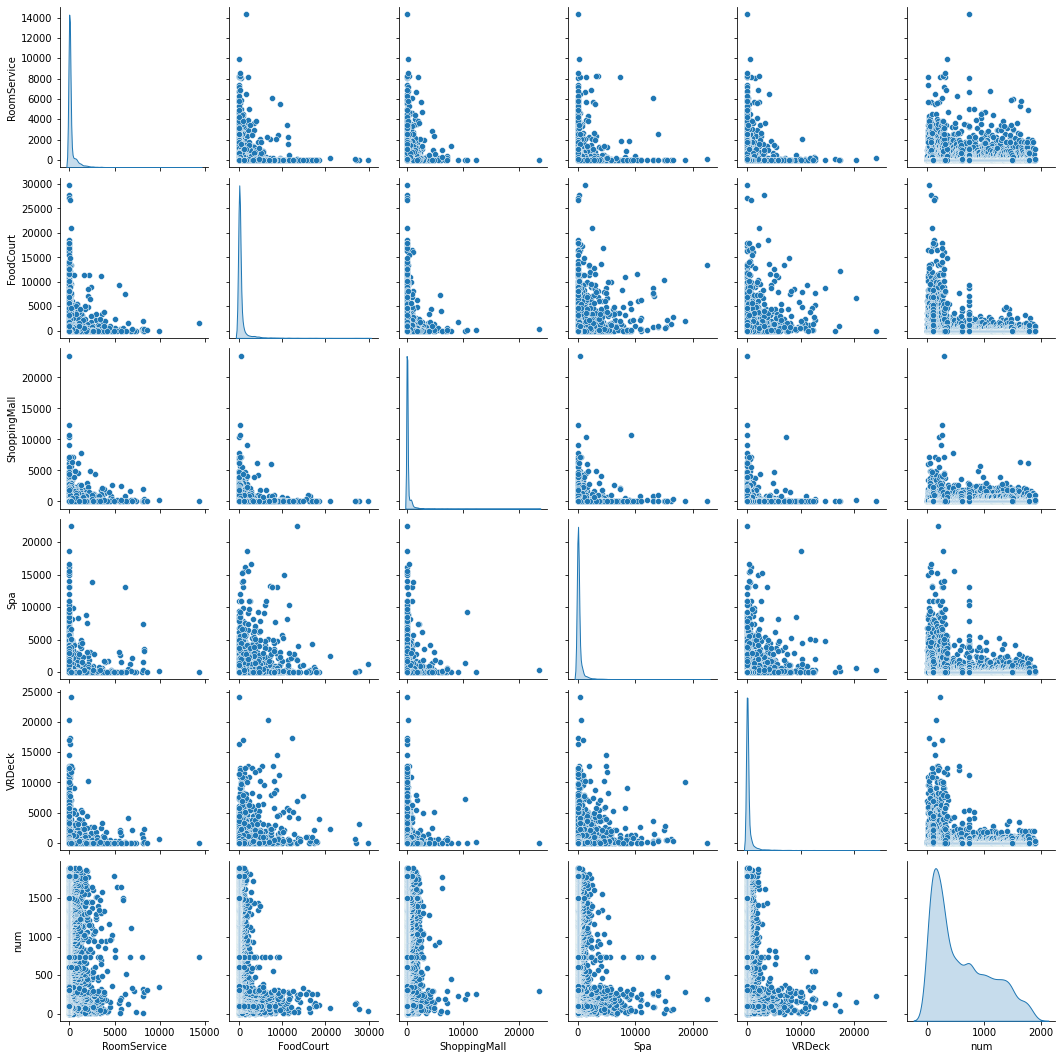

In [30]:
#plot the pair plot of numerical features
sns.pairplot(data = train_df, vars=num_features, diag_kind="kde")

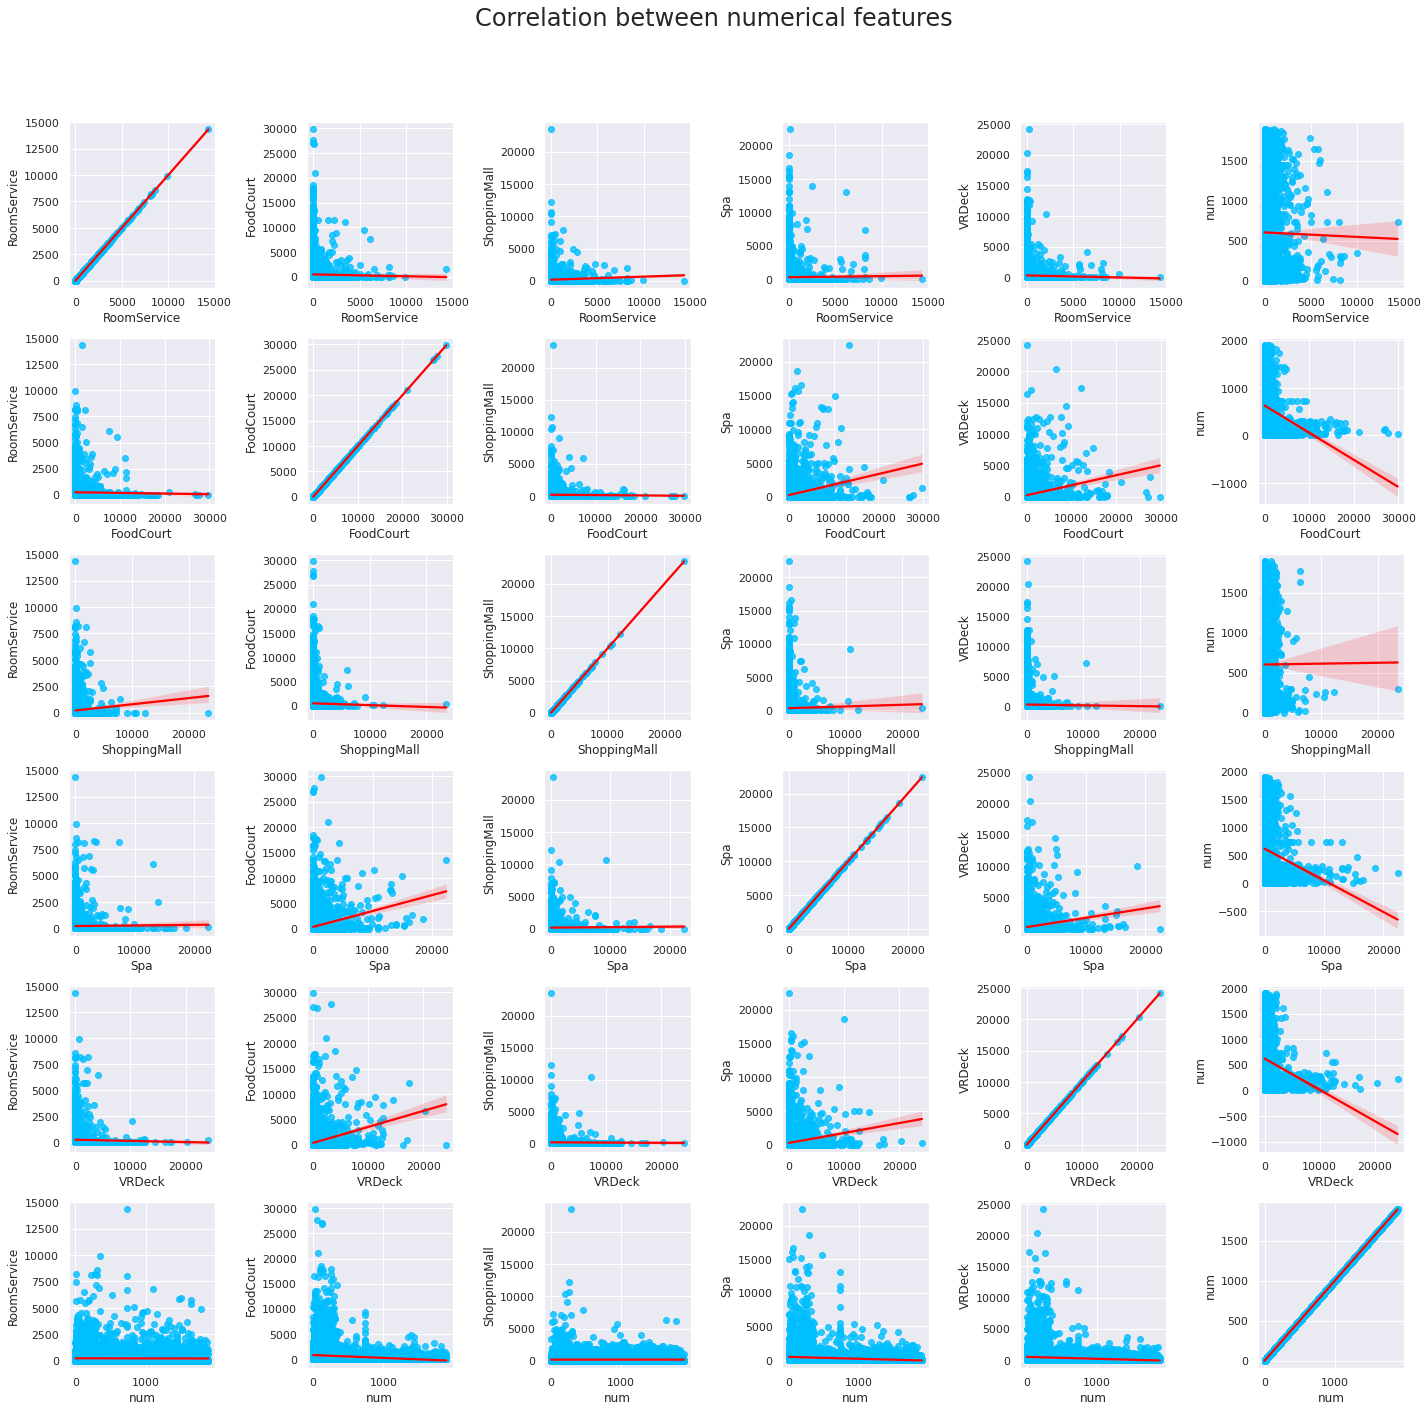

In [31]:
sns.set()
fig, axes = plt.subplots(len(num_features), len(num_features),figsize=(20, 20))
fig.suptitle('Correlation between numerical features', fontsize=24)
for i,col1 in enumerate(num_features):
    for j,col2 in enumerate(num_features):
        sns.regplot(x=col1,y=col2,data=train_df,color='blue', scatter_kws={
                    "color": "deepskyblue"}, line_kws={"color": "red"}, ax=axes[i,j])
fig.tight_layout()
plt.subplots_adjust(top=0.90)

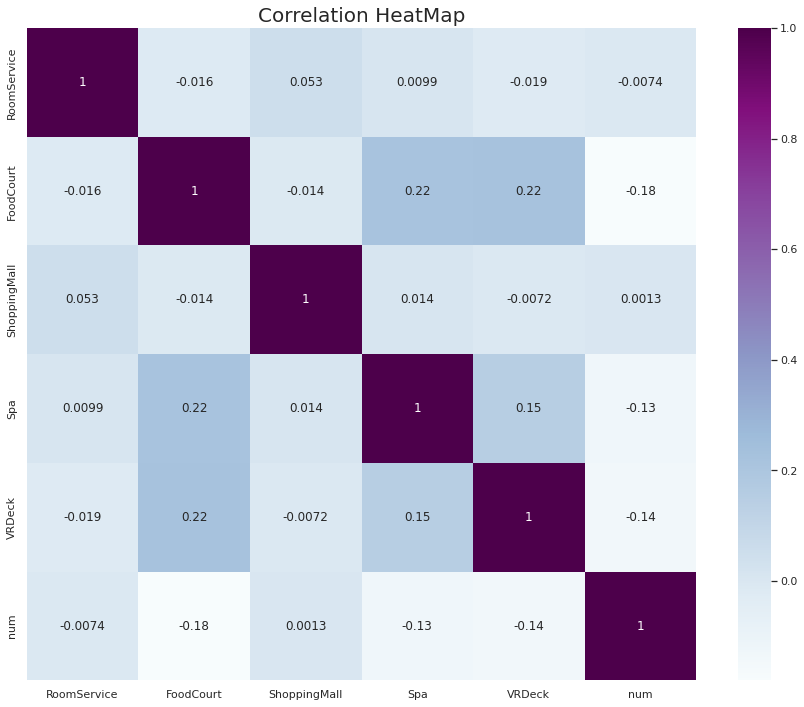

In [32]:
plt.figure(figsize=(15,12))
sns.heatmap(train_df[num_features].corr(),cmap='BuPu',annot=True)
plt.title ('Correlation HeatMap', fontsize=20)
plt.show()

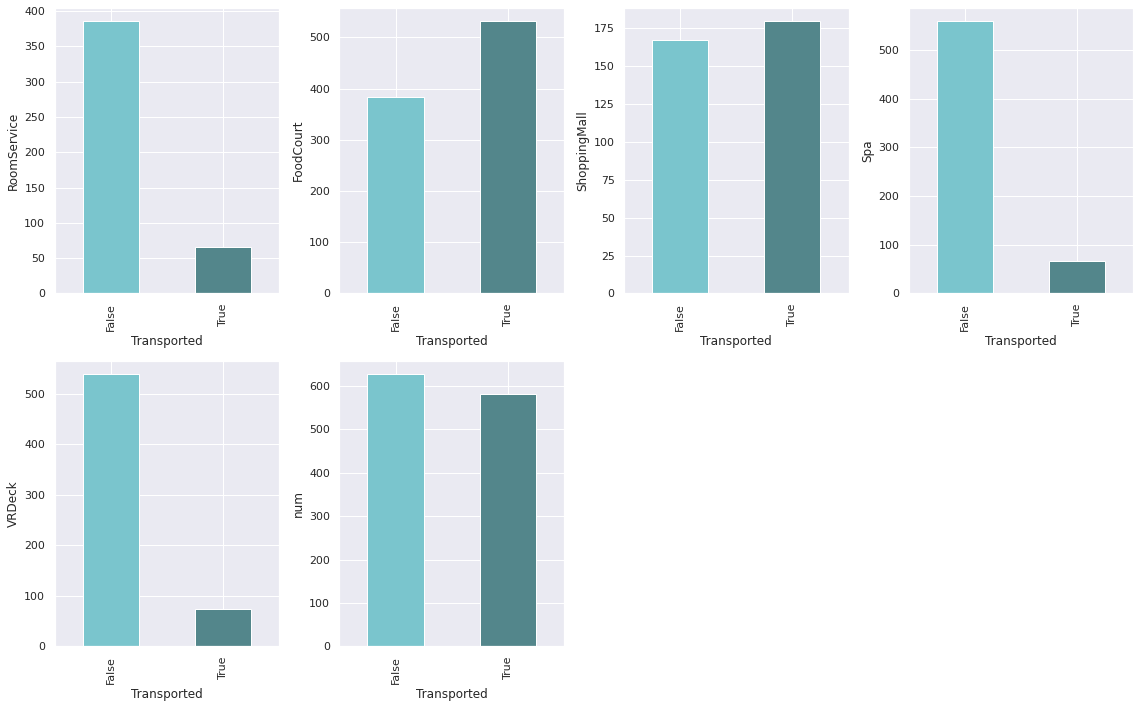

In [33]:
fig = plt.figure(figsize= (16,10))
for i, col in enumerate(num_features):
    
    ax=fig.add_subplot( 2, 4, i+1)

    train_df.groupby(['Transported'])[col].mean().plot(kind='bar',color=["#7AC5CD","#53868B"])
    ax.set_ylabel(col)
fig.tight_layout()  
plt.show()

We can see that:

- The significant majority of the passengers who spent more on RoomService, Spa and VRDeck were not transported.
- Among the passengers who have spent a lot in FoodCourt, there is a slight majority were transported.

### Categorical Feature Analysis

In [34]:
cat_features

['HomePlanet',
 'CryoSleep',
 'Destination',
 'Age',
 'VIP',
 'Transported',
 'deck',
 'side']

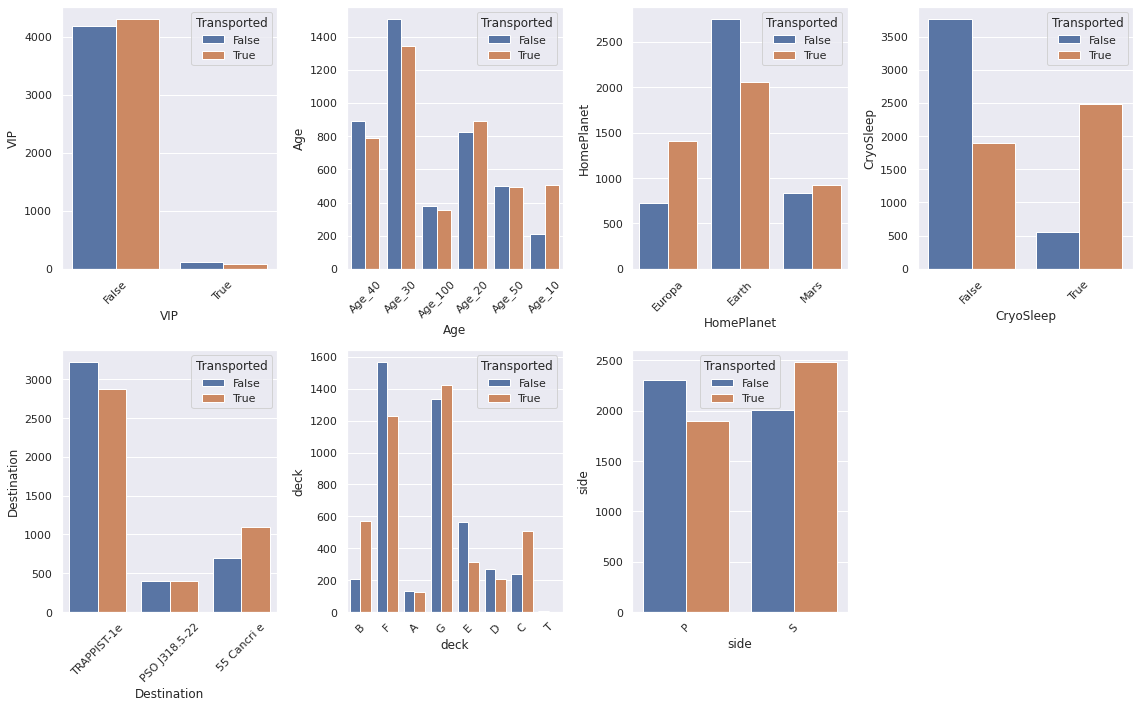

In [35]:
fig = plt.figure(figsize= (16,10))
for i, col in enumerate(['VIP', 'Age','HomePlanet','CryoSleep','Destination','deck', 'side']):
    
    ax=fig.add_subplot( 2, 4, i+1)

    sns.countplot(x=col,data=train_df,hue="Transported")
    ax.set_ylabel(col)
    plt.xticks(rotation=45)
fig.tight_layout()  
plt.show()

## Data Preprocessing 

In [36]:
train_df.dtypes

HomePlanet       object
CryoSleep        object
Destination      object
Age              object
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
deck             object
num             float64
side             object
dtype: object

In [37]:
for _, col_name in enumerate(['VIP', 'Age','HomePlanet','CryoSleep','Destination','deck', 'side']):
    train_df = pd.get_dummies(train_df, columns = [col_name], prefix = col_name + '_')
    test_df = pd.get_dummies(test_df, columns = [col_name], prefix = col_name + '_')

In [38]:
train_df.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,num,VIP__False,VIP__True,Age__Age_10,...,deck__A,deck__B,deck__C,deck__D,deck__E,deck__F,deck__G,deck__T,side__P,side__S
0,0.0,0.0,0.0,0.0,0.0,False,0.0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,109.0,9.0,25.0,549.0,44.0,True,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,43.0,3576.0,0.0,6715.0,49.0,False,0.0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0.0,1283.0,371.0,3329.0,193.0,False,0.0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,303.0,70.0,151.0,565.0,2.0,True,1.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [39]:
LABELS = test_df.columns 
encoder = LabelEncoder()
for col in LABELS: 
    if train_df[col].dtype == 'bool':
        train_df[col] = train_df[col].astype(int) 
        test_df[col] = test_df[col].astype(int)
train_df['Transported'] = train_df['Transported'].astype('int')

LABELS_SS = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
ss_scaler = StandardScaler()
# Apply Standard Scaling
train_df[LABELS_SS] = ss_scaler.fit_transform(train_df[LABELS_SS])
test_df[LABELS_SS] = ss_scaler.transform(test_df[LABELS_SS])

In [40]:
train_df.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,num,VIP__False,VIP__True,Age__Age_10,...,deck__A,deck__B,deck__C,deck__D,deck__E,deck__F,deck__G,deck__T,side__P,side__S
0,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,0,0.0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,1,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,-0.275409,1.955616,-0.290817,5.694289,-0.225782,0,0.0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,-0.340590,0.517406,0.330225,2.683471,-0.098708,0,0.0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0.118709,-0.243409,-0.038048,0.225732,-0.267258,1,1.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [41]:
test_df.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,num,VIP__False,VIP__True,Age__Age_10,Age__Age_100,...,deck__A,deck__B,deck__C,deck__D,deck__E,deck__F,deck__G,deck__T,side__P,side__S
0,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,3.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,-0.340590,-0.281669,-0.290817,2.233537,-0.269023,4.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,0.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,-0.340590,3.884937,-0.290817,-0.115719,0.247217,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,-0.325431,-0.287314,0.772152,-0.276663,-0.269023,5.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [42]:
train_df.shape, test_df.shape

((8693, 33), (4277, 32))

In [43]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'yeo-johnson')
train_df[num_features] = pt.fit_transform(train_df[num_features])


In [44]:
x = train_df.drop(['Transported'],axis=1)
y = train_df['Transported']

<AxesSubplot:>

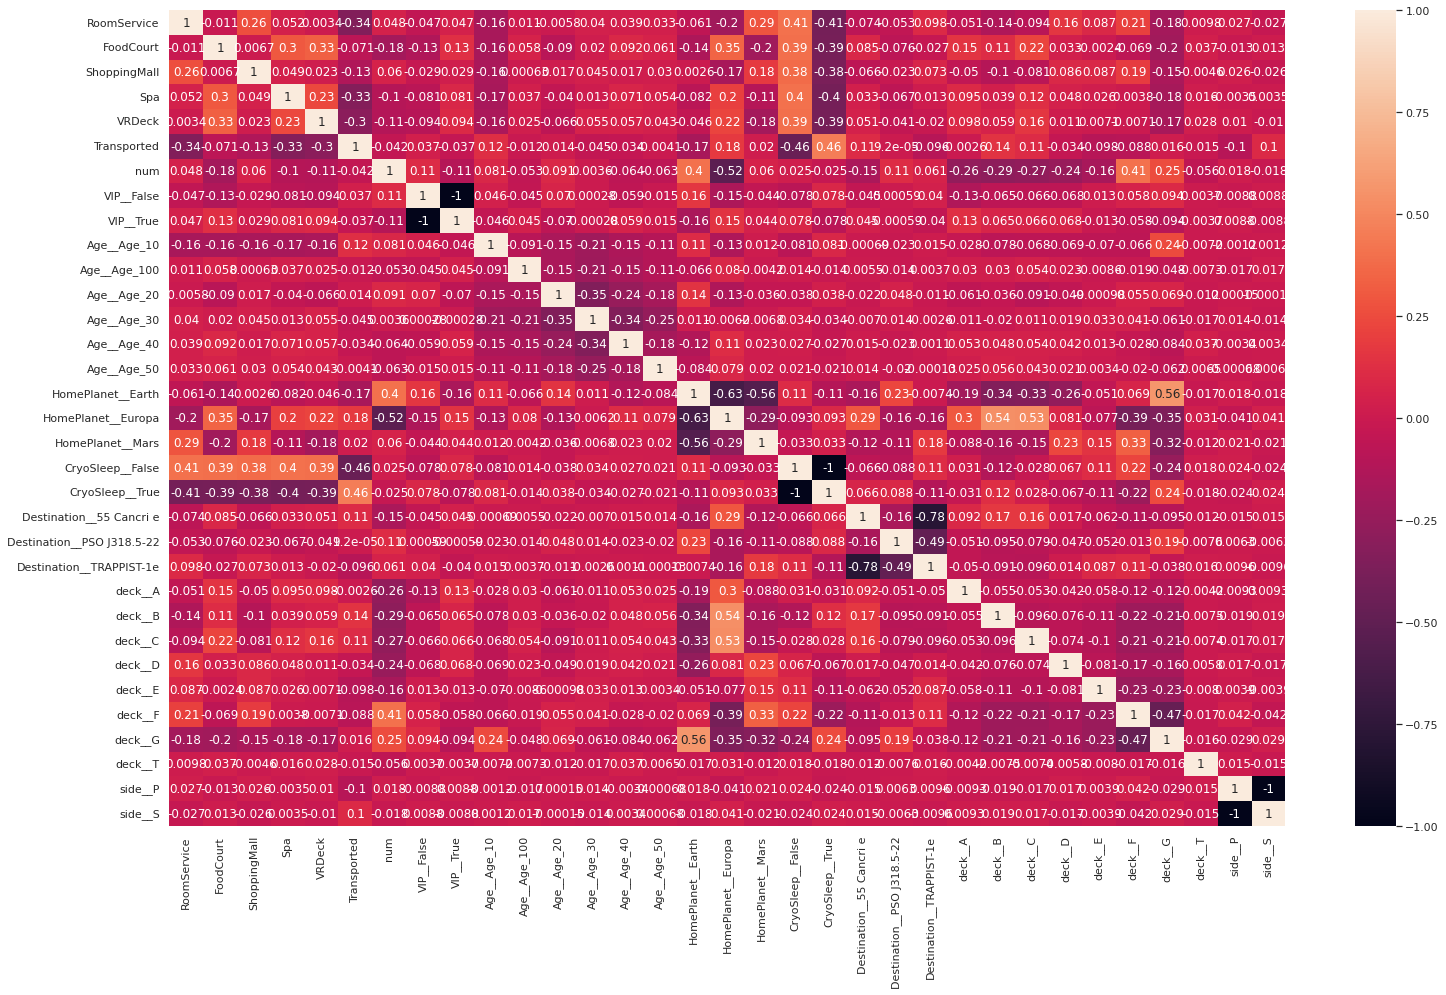

In [45]:
plt.figure(figsize=(25, 15))
sns.heatmap(train_df.corr(), annot=True)

## Data Modelling

In [46]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
X_train.dtypes

RoomService                   float64
FoodCourt                     float64
ShoppingMall                  float64
Spa                           float64
VRDeck                        float64
num                           float64
VIP__False                      uint8
VIP__True                       uint8
Age__Age_10                     uint8
Age__Age_100                    uint8
Age__Age_20                     uint8
Age__Age_30                     uint8
Age__Age_40                     uint8
Age__Age_50                     uint8
HomePlanet__Earth               uint8
HomePlanet__Europa              uint8
HomePlanet__Mars                uint8
CryoSleep__False                uint8
CryoSleep__True                 uint8
Destination__55 Cancri e        uint8
Destination__PSO J318.5-22      uint8
Destination__TRAPPIST-1e        uint8
deck__A                         uint8
deck__B                         uint8
deck__C                         uint8
deck__D                         uint8
deck__E     

## Training

In [47]:
import lightgbm as lgb

In [48]:
model = lgb.LGBMClassifier(n_estimators = 4000,
                           random_state=42,learning_rate=0.0018,
                           objective="binary", 
                           max_depth= 4,
                           lambda_l1 = 0.0065945489517726524,
                           lambda_l2 = 0.7458020661126018,
                           min_child_samples= 20,
                           num_leaves = 150,
                           feature_fraction = 0.9848124444307711,
                           bagging_fraction=0.5463653848083458,
                           bagging_freq = 3
                                                     )
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=25,eval_metric='auc')

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.0065945489517726524, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0065945489517726524
[LightGBM] [Warning] bagging_fraction is set=0.5463653848083458, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5463653848083458
[LightGBM] [Warning] feature_fraction is set=0.9848124444307711, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9848124444307711
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.7458020661126018, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7458020661126018
[25]	training's auc: 0.866895	training's binary_logloss: 0.676758	valid_0's auc: 0.853956	valid_0's binary_logloss: 0.677125
[50]	training's auc: 0.872822	training's binary_logloss: 0.661542	valid_0's auc: 0.860189	valid_0's binary_logloss: 0.662285
[75]	training's auc: 0.87293	training's binary_logloss: 0.647398	val

LGBMClassifier(bagging_fraction=0.5463653848083458, bagging_freq=3,
               feature_fraction=0.9848124444307711,
               lambda_l1=0.0065945489517726524, lambda_l2=0.7458020661126018,
               learning_rate=0.0018, max_depth=4, n_estimators=4000,
               num_leaves=150, objective='binary', random_state=42)

In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
strtfdKFold = StratifiedKFold(n_splits=10)
scores = cross_val_score(model, x, y, scoring='roc_auc', cv=strtfdKFold, n_jobs=-1)

In [50]:
scores

array([0.89362686, 0.85459475, 0.865421  , 0.87817824, 0.88227816,
       0.9224274 , 0.92144477, 0.91008751, 0.90818051, 0.87639714])

In [51]:
scores.mean()

0.8912636333675902

## Prediction

In [52]:
pred=pd.Series(model.predict(test_df)).map({0:False, 1:True})
len(pred)

4277

In [53]:
submission = pd.DataFrame({'PassengerId': Id_test_list,
                       'Transported': pred})
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [54]:
submission['Transported'].value_counts()

False    2668
True     1609
Name: Transported, dtype: int64

In [55]:
submission.to_csv('submission.csv', index=False)